- KEYWORDS: scipy.optimize.fsolve, numpy.roots, numpy.polyder, numpy.polyval, numpy.polyint, numpy.poly1d


## Special nonlinear systems - polynomials



Polynomials are a special class of nonlinear algebraic equations that are especially easy to solve. A polynomial is linear in the coefficients in front of the variable. If we consider the following $n^{th}$ order polynomial:

$p_0 x^n + p_1 x^{(n-1)} + ... + p_{n-1} x + p_n = 0$

Let's be specific:

$x^2 + 8x + 16 = 0$

We express this as [1, 8, 16].



In [1]:
import numpy as np

p = [1, 8, 16]
r = np.roots(p)
r

array([-4., -4.])

Note we get all the roots. We can check that with the `numpy.polyval` command.



In [2]:
np.polyval(p, r)

array([0., 0.])

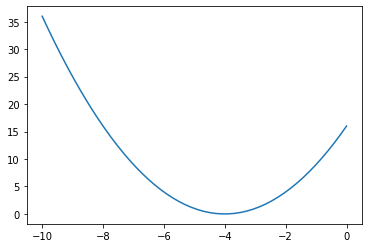

In [3]:
x = np.linspace(-10, 0)
y = np.polyval(p, x)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y)

We can also use this to plot a polynomial.



Text(0, 0.5, 'y')

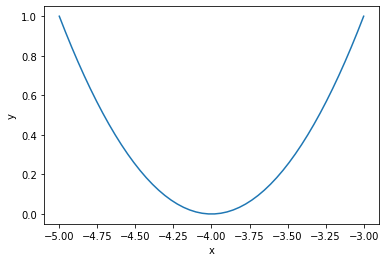

In [4]:
import numpy as np

x = np.linspace(-5, -3)
y = np.polyval(p, x)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

Why is this so convenient?



### Cubic equations of state



There are applications of polynomials in thermodynamics. The van der waal equation is a cubic polynomial $f(V) = V^3 - \frac{p n b + n R T}{p} V^2 + \frac{n^2 a}{p}V - \frac{n^3 a b}{p} = 0$, where $a$ and $b$ are constants, $p$ is the pressure, $R$ is the gas constant, $T$ is an absolute temperature and $n$ is the number of moles. The roots of this equation tell you the volume of the gas at those conditions.



In [5]:
# numerical values of the constants
a = 3.49e4
b = 1.45
p = 679.7   # pressure in psi
T = 683     # T in Rankine
n = 1.136   # lb-moles
R = 10.73   # ft^3 * psi / R / lb-mol

ppar = [1.0,                           # V**3
        -(p * n * b + n * R * T) / p,  # V**2
        n**2 * a / p,                  # V
        -n**3 * a * b / p]             # constant

print(np.roots(ppar))

R = np.roots(ppar)
R

[5.09432376+0.j         4.4006681 +1.43502848j 4.4006681 -1.43502848j]


array([5.09432376+0.j        , 4.4006681 +1.43502848j,
       4.4006681 -1.43502848j])

In [6]:
print(f'V = {R[0]:1.2f}')

V = 5.09+0.00j


In [7]:
print(f'V = {R[0].real:1.2f}')

V = 5.09


In [8]:
R[0].real, R[0].imag

(5.0943237645545985, 0.0)

In [9]:
float(R[0])

C:\Users\jqbon\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


5.0943237645545985

Note that only one root is real (and even then, we have to interpret 0.j as not being imaginary. Also, in a cubic polynomial, there can only be two imaginary roots). In this case that means there is only one phase present.



### Other useful things to remember about polynomials



You can easily get the parameters of the derivative of the polynomial with `numpy.polyder`.



In [10]:
p = [1, 8, 16]

pd = np.polyder(p)
pd

array([2, 8])

You can use these with `numpy.polyval` to compute the derivative at different points.



In [11]:
np.polyval(pd, [0, 1, 2])

array([ 8, 10, 12])

You can also get the coefficients of the integral of the polynomial. The integration constant is assumed to be 0 by default.



In [12]:
pint = np.polyint(p)
pint

array([ 0.33333333,  4.        , 16.        ,  0.        ])

You can use this to compute definite integrals, e.g. from x=1 to x=2:



In [13]:
np.polyval(pint, 2) - np.polyval(pint, 1)

30.33333333333334

In [14]:
X = np.linspace(1, 2, 100)
Y = np.polyval(p, X)
np.trapz(Y, X)

30.333350338400844

In [15]:
def integrand(x):
    return np.polyval(p, x)
   
from scipy.integrate import quad
quad(integrand, 1, 2)

(30.333333333333332, 3.367676508029641e-13)

In [17]:
%%timeit
def integrand(x):
    return np.polyval(p, x)
   
from scipy.integrate import quad
quad(integrand, 1, 2)

224 µs ± 9.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
%%timeit
def integrand(x):
    return x**2 + 8 * x + 16

from scipy.integrate import quad
quad(integrand, 1, 2)

11.3 µs ± 632 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
??np.polyval

**exercise** Use another method to confirm the result above.

Finally, the syntax `np.polyval(pint, 2)` can be a little tedious. You can create a function with `numpy.poly1d` using the array of coefficients. Conveniently, you can use the function in the roots, polyder and polyint commands!



In [18]:
coeffs = [1, 1, 1, 1]

p = np.poly1d(coeffs)
print(p)
p(2) - p(1)

   3     2
1 x + 1 x + 1 x + 1


11

In [20]:
print(integrand)

<function integrand at 0x00000279E3AF23A8>


In [19]:
p

poly1d([1, 1, 1, 1])

In [20]:
print(p)

   3     2
1 x + 1 x + 1 x + 1


In [21]:
np.roots(p)

array([-1.00000000e+00+0.j, -7.77156117e-16+1.j, -7.77156117e-16-1.j])

In [22]:
p([np.linspace(0, 1, 5)])

array([[1.      , 1.328125, 1.875   , 2.734375, 4.      ]])

In [24]:
p

poly1d([1, 1, 1, 1])

## Systems of nonlinear equations



Analogously to systems of ordinary differential equations, with systems of nonlinear equations we define functions that will return a zero for each equation in the system. Then we have to pass an initial guess for each variable to fsolve, and it will return an array of values, one for each variable.

It is considerably more difficult to visualize systems of nonlinear equations. With two equations and two unknowns it is sometimes easy to plot solutions, but not always.

\begin{align}
y &=& x^2 \\
y &=& 8 - x^2
\end{align}

One approach to visualizing this is to plot the two curves.



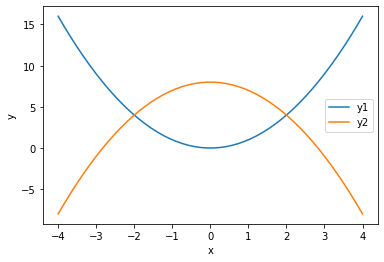

In [25]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-4, 4)

y1 = x**2
y2 = 8 - x**2

plt.plot(x, y1, x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y1', 'y2'])

You can see that on this domain, there is one place where the two curves intersect near the point (2, 5), which is a solution point. At this point there is one (x, y) pair that is a solution to *both* equations.



In [25]:
from scipy.optimize import fsolve

def objective(X):
    x, y = X
    z1 = y - x**2      # y = x**2
    z2 = y - 8 + x**2  # y = 8 - x**2
    return np.array([z1, z2])

guess = [-2, -5]
fsolve(objective, guess)

array([-2.,  4.])

It is not always easy to solve for one variable in terms of the other though. In that case, we can resort to an alternate graphical approach where we evaluate the objective function over a range of the variables, and look for regions where they overlap.

Consider the solution to these equations (adapted from [https://www.mathworks.com/help/optim/ug/fsolve.html](https://www.mathworks.com/help/optim/ug/fsolve.html)):

$e^{-e^{-(x_1 + x_2)}} = x_2 (1 + x_1^2)$

and

$x_1 \cos(x_2) + x_2 \sin(x_1) = 1/2$

It is not possible to solve either one for one variable in terms of the other. So instead, we will compute the objective function for a range of $x_1, x_2$ values, and then use a contour plot of each equation to see where there might be a solution.

The key to this visualization is where we draw the contours. A good choice is to highlight only the part of the solutions that bracket zero. Then we can see where they intersect, because there is probably a solution in that neighborhood.



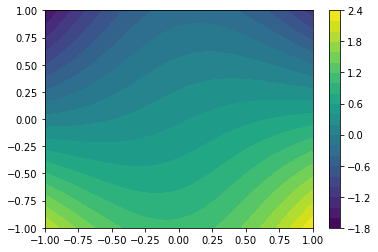

In [33]:
def objective(X):
    x1, x2 = X
    z1 = np.exp(-np.exp(-(x1 + x2))) - x2 * (1 + x1**2)
    z2 = x1 * np.cos(x2) + x2 * np.sin(x1) - 0.5
    return np.array([z1, z2])


x1 = np.linspace(-1, 1)
x2 = np.linspace(-1, 1)

X1, X2 = np.meshgrid(x1, x2)

Z1, Z2 = objective([X1, X2])
plt.contourf(X1, X2, Z1, levels=20)
plt.colorbar()

In [28]:
?plt.contourf

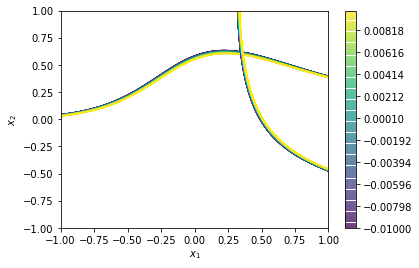

In [34]:
plt.contour(X1, X2, Z1, levels=np.linspace(-0.01, 0.01, 100))
plt.contour(X1, X2, Z2, levels=np.linspace(-0.01, 0.01, 100))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.colorbar()

There is an intersection near $x_1=0.4$, and $x\_2 = 0.6. We can use that as an initial guess.



In [35]:
ans = fsolve(objective, [0.4, 0.6])  # note we do not need ans, because ans will have two values in it.
ans, objective(ans)

(array([0.35324662, 0.60608174]), array([-2.22044605e-16,  1.11022302e-16]))

In [86]:
?fsolve


Failed at guess [-7.461105497849432, -0.6531877314741807].
The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
Failed at guess [-9.369529560601721, -0.7442780593721987].
The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.


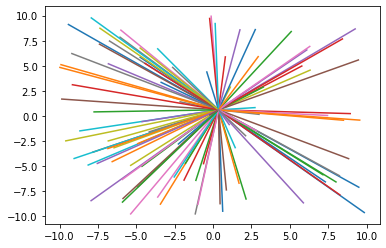

In [34]:
for i in range(100):
    guess = [(np.random.random() - 0.5) * 20, (np.random.random() - 0.5) * 20]
    ans, info, ier, msg  = fsolve(objective, guess, full_output=True)
    if ier != 1:
        print(f'Failed at guess {guess}.\n{msg}')
        continue
    plt.plot([guess[0], ans[0]], [guess[1], ans[1]])

In [36]:
all_answers = []
for i in range(100):
    guess = [(np.random.random() - 0.5) * 20, (np.random.random() - 0.5) * 20]
    ans, info, ier, msg  = fsolve(objective, guess, full_output=True)
    if ier != 1:
        print(f'Failed at guess {guess}.\n{msg}')
        continue
    all_answers += [ans]
np.std(np.array(all_answers), axis=0)

array([2.34950483e-12, 5.82901246e-12])

(0.0, 1.0)

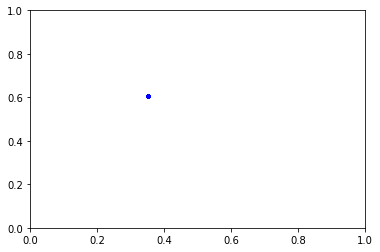

In [37]:
AA = np.array(all_answers)
plt.plot(AA[:, 0], AA[:, 1], 'b.')
plt.xlim([0, 1])
plt.ylim([0, 1])

This shows the solution, and that the objective is practically equal to zero at that point.

You can see that trying to do this in more than 2 dimensions can quickly get difficult to visualize!



## Summary



-   We learned about a special class of nonlinear functions that are polynomials, and a series of useful functions to manipulate them.

-   We learned that you can use fsolve to find solutions to coupled non-linear algebraic equations.

-   Next time, we will apply this to solving a nonlinear boundary value differential equation.

